In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
PROJ_ROOT = os.path.abspath(os.path.join(os.pardir))
print(PROJ_ROOT)

/home/neha/Desktop/code/ML/Kaggle/googleanalytics


In [16]:
x = pd.read_csv('../data/processed/user_feaures_20170501.csv',dtype={'fullVisitorId': 'str'})
y = pd.read_csv('../data/processed/user_predictions_20170501.csv',dtype={'fullVisitorId': 'str'})

In [17]:
raw = pd.read_csv('../data/processed/train_v2_flat.csv', dtype={'fullVisitorId': 'str'})

/home/neha/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
raw.head(1).T

,0
channelGrouping,Organic Search
date,20171016
fullVisitorId,3162355547410993243
socialEngagementType,Not Socially Engaged
visitId,1508198450
visitNumber,1
visitStartTime,1508198450
device_browser,Firefox
device_browserSize,not available in demo dataset
device_browserVersion,not available in demo dataset


In [43]:
raw_x = raw[(raw.date >= 20170501) & (raw.date <= 20171015)]
raw_y = raw[(raw.date >= 20171201) & (raw.date <= 20180131)]

In [22]:
x.head(1).T

,0
fullVisitorId,0000049363351866189
date_min,2017-09-18
date_max,2017-09-19
visitNumber_max,3
totals_bounces_sum,3
totals_bounces_mean,1
totals_bounces_median,1
totals_hits_sum,3
totals_hits_min,1
totals_hits_max,1


In [15]:
raw_x[raw_x.fullVisitorId == '0000049363351866189'].T

,673988,674984,1361332
channelGrouping,Direct,Direct,Direct
date,20170918,20170918,20170919
fullVisitorId,0000049363351866189,0000049363351866189,0000049363351866189
socialEngagementType,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged
visitId,1505779414,1505796426,1505863874
visitNumber,1,2,3
visitStartTime,1505779414,1505796426,1505863874
device_browser,Chrome,Chrome,Chrome
device_browserSize,not available in demo dataset,not available in demo dataset,not available in demo dataset
device_browserVersion,not available in demo dataset,not available in demo dataset,not available in demo dataset


In [23]:
# for features device_browser, device_deviceCategory, geoNetwork_city, 
# geoNetwork_continent, geoNetwork_country, geoNetwork_region, geoNetwork_subContinent

In [25]:
raw_x.totals_bounces.isnull().sum()

197854

In [27]:
raw_x.totals_hits.isnull().sum()

0

In [28]:
raw_x.totals_newVisits.isnull().sum()

104196

In [31]:
raw_x.totals_pageviews.median()

1.0

In [35]:
raw_x.totals_sessionQualityDim.isnull().sum()/raw_x.shape[0]

0.31739214293442725

In [38]:
raw_x.totals_sessionQualityDim.median()

1.0

In [41]:
raw_x[raw_x.totals_sessionQualityDim.isnull()].totals_transactions.sum()

2157.0

In [44]:
sum(raw_x[raw_x.totals_sessionQualityDim.isnull()].totals_totalTransactionRevenue > 0)

2085

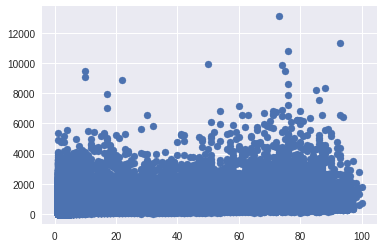

In [49]:
plt.scatter(raw_x.totals_sessionQualityDim, raw_x.totals_timeOnSite)

In [52]:
raw_x.totals_timeOnSite.isnull().sum()/raw_x.shape[0]

0.5369308425811369

In [54]:
raw_x.totals_timeOnSite.median()

93.0

In [56]:
raw_x[raw_x.totals_transactionRevenue > 0].totals_timeOnSite.median()

794.0

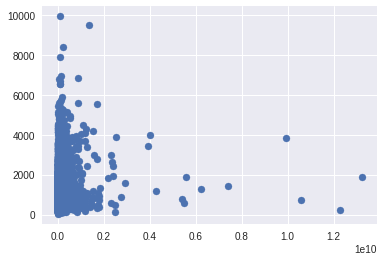

In [57]:
plt.scatter(raw_x.totals_transactionRevenue, raw_x.totals_timeOnSite)

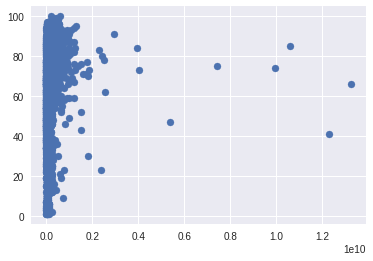

In [59]:
plt.scatter(raw_x.totals_transactionRevenue, raw_x.totals_sessionQualityDim)

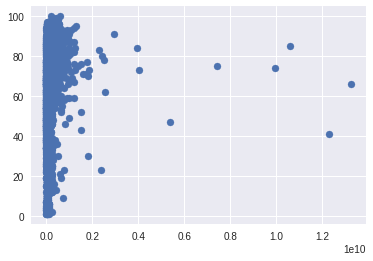

In [60]:
plt.scatter(raw_x[raw_x.totals_transactionRevenue > 0].totals_transactionRevenue, raw_x[raw_x.totals_transactionRevenue > 0].totals_sessionQualityDim)

In [64]:
raw_x.totals_visits.isnull().sum()

0

In [66]:
raw_x.totals_visits.describe()

count    425146.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: totals_visits, dtype: float64

In [68]:
x.totals_visits_min.value_counts()/x.shape[0]

1    1.0
Name: totals_visits_min, dtype: float64

In [70]:
raw_x.columns[raw_x.nunique(dropna=False) == 1]

Index(['socialEngagementType', 'device_browserSize', 'device_browserVersion',
       'device_flashVersion', 'device_language', 'device_mobileDeviceBranding',
       'device_mobileDeviceInfo', 'device_mobileDeviceMarketingName',
       'device_mobileDeviceModel', 'device_mobileInputSelector',
       'device_operatingSystemVersion', 'device_screenColors',
       'device_screenResolution', 'geoNetwork_cityId', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'geoNetwork_networkLocation', 'totals_visits',
       'trafficSource_adwordsClickInfo.criteriaParameters',
       'trafficSource_campaignCode'],
      dtype='object')

In [72]:
raw_x.totals_visits.value_counts()

1    425146
Name: totals_visits, dtype: int64

In [73]:
raw_x.nunique(dropna=False)

channelGrouping                                           8
date                                                    168
fullVisitorId                                        329636
socialEngagementType                                      1
visitId                                              416188
visitNumber                                             325
visitStartTime                                       416642
device_browser                                           47
device_browserSize                                        1
device_browserVersion                                     1
device_deviceCategory                                     3
device_flashVersion                                       1
device_isMobile                                           2
device_language                                           1
device_mobileDeviceBranding                               1
device_mobileDeviceInfo                                   1
device_mobileDeviceMarketingName        

In [18]:
raw_x.drop('socialEngagementType', axis=1).columns

NameError: name 'raw_x' is not defined

In [20]:
# for features device_browser, device_deviceCategory, geoNetwork_city, 
# geoNetwork_continent, geoNetwork_country, geoNetwork_region, geoNetwork_subContinent

train = pd.merge(x, y, on='fullVisitorId', how='left')

In [22]:
train.shape[0]

329636

In [45]:
raw_x['t'] = 0

/home/neha/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [48]:
raw_x.loc[raw_x.totals_transactionRevenue > 0, 't'] = 1

/home/neha/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [49]:
raw_x.t.sum()

5547

In [51]:
raw_x.groupby('device_browser')['t'].mean().sort_values(ascending=False)

device_browser
Chrome                                         0.016888
Firefox                                        0.009221
Internet Explorer                              0.004790
Safari                                         0.004576
Edge                                           0.004120
Opera                                          0.002964
Safari (in-app)                                0.001610
Samsung Internet                               0.000593
Android Webview                                0.000562
Amazon Silk                                    0.000000
IE with Chrome Frame                           0.000000
+Simple Browser                                0.000000
DDG-Android-3.1.1                              0.000000
Coc Coc                                        0.000000
0                                              0.000000
Changa 99695759                                0.000000
Browser                                        0.000000
CSM Click                        

In [52]:
raw_x.device_browser.value_counts()

Chrome                                         294833
Safari                                          77585
Firefox                                         15182
Internet Explorer                                7307
Android Webview                                  7113
Samsung Internet                                 6743
Edge                                             4612
Safari (in-app)                                  3727
Opera Mini                                       3287
Opera                                            1687
UC Browser                                       1470
Amazon Silk                                       384
YaBrowser                                         328
Android Browser                                   227
Coc Coc                                           213
Mozilla Compatible Agent                          138
Maxthon                                            72
Puffin                                             66
BlackBerry                  

In [53]:
raw_x.groupby('device_deviceCategory')['t'].mean().sort_values(ascending=False)

device_deviceCategory
desktop    0.019395
mobile     0.002773
tablet     0.003337
Name: t, dtype: float64

In [65]:
p = raw_x.groupby('geoNetwork_city')['t'].mean().sort_values(ascending=False)
p[p> 0.1].index.values

array(['Richmond', 'Las Vegas', 'Edison', 'Tacoma', 'Walnut Creek',
       'Chelmsford', 'Dundalk', 'Council Bluffs'], dtype=object)

In [78]:
p[(p > 0.05) & (p<0.1)].index.values

array(['Reston', 'Ann Arbor', 'Lake Oswego', 'Milwaukee', 'San Bruno',
       'Bellevue', 'Baltimore', 'Kirkland', 'Cambridge', 'Austin'],
      dtype=object)

In [77]:
p[(p > 0.03) & (p<0.05)].index.values

array(['New York', 'Berkeley', 'Seattle', 'Chicago', 'Milpitas', 'Irvine',
       'Sunnyvale', 'Boulder', 'Barrie', 'San Marcos', 'Mountain View',
       'Cupertino', 'Oakland', 'Atlanta', 'Jersey City', 'San Francisco'],
      dtype=object)

In [76]:
p[(p > 0.01) & (p<0.03)].index.values

array(['Oklahoma City', 'Salem', 'Los Angeles', 'Calgary', 'Kansas City',
       'Fremont', 'Pittsburgh', 'Santa Clara', 'Palo Alto',
       'Redwood City', 'San Mateo', 'Birmingham', 'Portland', 'San Diego',
       'Fresno', 'San Jose', 'Washington', 'Minneapolis', 'Chico',
       'Omaha', 'Santa Monica', 'South San Francisco', 'Denver',
       'Nashville', 'Boston', 'Dallas', 'Houston', 'Columbus', 'Raleigh'],
      dtype=object)

In [58]:
# geoNetwork_continent, geoNetwork_country, geoNetwork_region, geoNetwork_subContinent
raw_x.groupby('geoNetwork_continent')['t'].mean().sort_values(ascending=False)

geoNetwork_continent
Americas     0.023118
(not set)    0.003604
Oceania      0.000980
Africa       0.000725
Asia         0.000606
Europe       0.000531
Name: t, dtype: float64

In [60]:
raw_x.groupby('geoNetwork_country')['t'].mean().sort_values(ascending=False)

geoNetwork_country
St. Lucia                   0.066667
United States               0.026883
Canada                      0.007814
Venezuela                   0.005837
Cambodia                    0.005747
Panama                      0.005076
Guatemala                   0.004255
(not set)                   0.003604
Puerto Rico                 0.002976
Finland                     0.002488
Switzerland                 0.002405
Nigeria                     0.002086
Ukraine                     0.001992
Greece                      0.001971
Chile                       0.001970
Israel                      0.001790
Indonesia                   0.001640
Mexico                      0.001627
Singapore                   0.001594
Argentina                   0.001350
Belgium                     0.001315
Egypt                       0.001218
Norway                      0.001202
Taiwan                      0.001184
South Korea                 0.001152
Malaysia                    0.001141
South Africa       

In [61]:
raw_x.groupby('geoNetwork_region')['t'].mean().sort_values(ascending=False)

geoNetwork_region
Maryland                         0.061224
Michigan                         0.058184
New York                         0.048316
Illinois                         0.045540
Washington                       0.041821
Massachusetts                    0.040000
Iowa                             0.038462
Oregon                           0.033505
California                       0.033466
Georgia                          0.033391
Oklahoma                         0.028571
Colorado                         0.025826
Texas                            0.025123
Wisconsin                        0.023810
New Jersey                       0.022346
Virginia                         0.022173
District of Columbia             0.021326
Alberta                          0.020408
Minnesota                        0.019512
Nebraska                         0.018519
Missouri                         0.016393
Nevada                           0.016129
Pennsylvania                     0.015862
Arizona         

In [62]:
raw_x.groupby('geoNetwork_subContinent')['t'].mean().sort_values(ascending=False) 

geoNetwork_subContinent
Northern America      0.025708
(not set)             0.003604
Caribbean             0.001986
Central America       0.001687
Western Africa        0.001458
Southern Africa       0.001057
Australasia           0.000991
Eastern Asia          0.000938
Southeast Asia        0.000792
South America         0.000725
Western Europe        0.000719
Western Asia          0.000489
Northern Europe       0.000489
Northern Africa       0.000466
Eastern Europe        0.000461
Southern Europe       0.000337
Southern Asia         0.000238
Middle Africa         0.000000
Micronesian Region    0.000000
Melanesia             0.000000
Eastern Africa        0.000000
Central Asia          0.000000
Polynesia             0.000000
Name: t, dtype: float64